<a href="https://colab.research.google.com/github/AnandDaksh/Crop-Disease-Classification/blob/main/(VGG_16)_Potato_Plant_Village_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
pip install --upgrade keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0.post1 requires keras<2.16,>=2.15.0, but you have keras 3.0.5 which is incompatible.


Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
58889256/58889256 [==============================] - 1s 0us/step
Epoch 1/5
54/54 [==============================] - 1236s 23s/step - loss: 4.3596 - accuracy: 0.8240 - val_loss: 0.5051 - val_accuracy: 0.8884
Epoch 2/5
54/54 [==============================] - 1217s 23s/step - loss: 0.2542 - accuracy: 0.9390 - val_loss: 0.2500 - val_accuracy: 0.9372
Epoch 3/5
54/54 [==============================] - 1216s 23s/step - loss: 0.3011 - accuracy: 0.9280 - val_loss: 0.4077 - val_accuracy: 0.8837
Epoch 4/5
54/54 [==============================] - 1223s 23s/step - loss: 0.2285 - accuracy: 0.9379 - val_loss: 0.1856 - val_accuracy: 0.9674
Epoch 5/5
27/27 [==============================] - 237s 9s/step - loss: 0.2491 - accuracy: 0.9488
Test Accuracy: 0.9488372206687927
27/27 [==============================] - 237s 9s/step


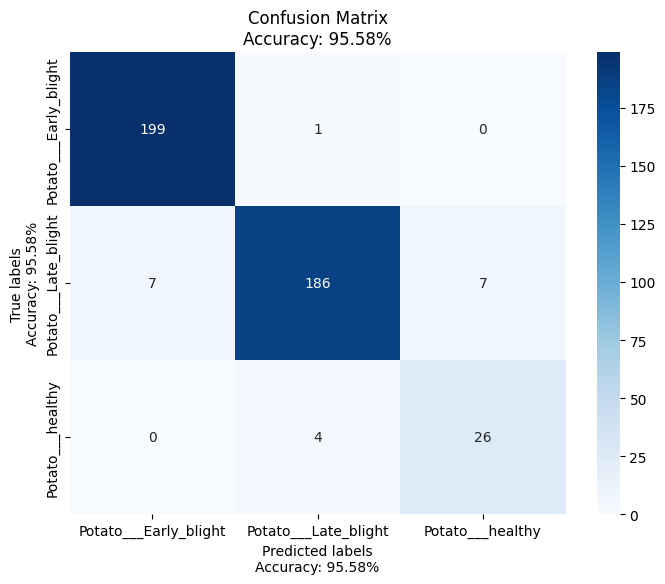

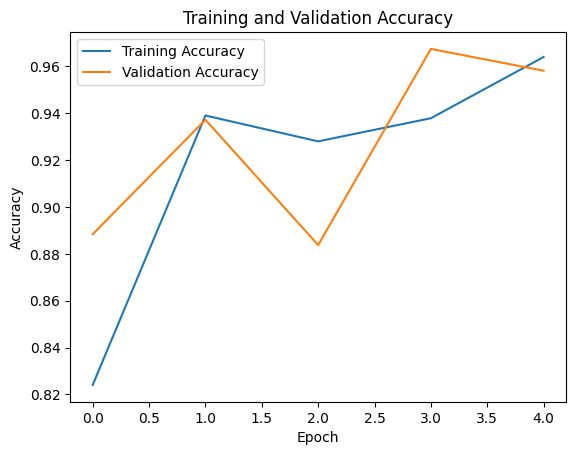

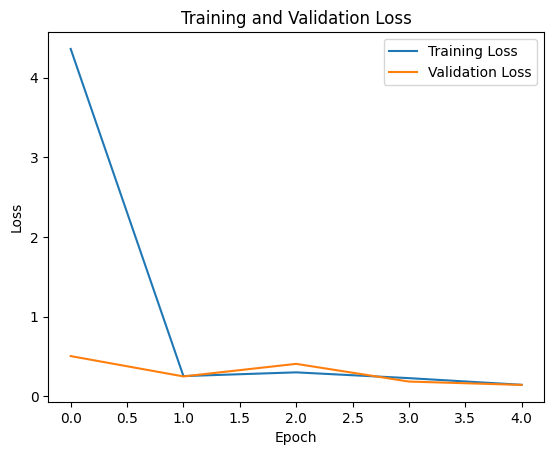

Predicted class name: Potato___Early_blight


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import VGG16

# Define classes
classes = ["Potato___Early_blight", "Potato___Late_blight", "Potato___healthy"]

# Define the path to the folder containing the images
data_dir = "/content/drive/MyDrive/Plant Village Datasets/Potato"

# Initialize ImageDataGenerator for data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # Splitting the data into training and validation sets
)

# Load and augment the training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Resizing images to 224x224 to match the input shape of VGG16
    batch_size=32,
    class_mode='sparse',  # Since we have sparse categorical labels
    shuffle=True,
    subset='training'  # Specify that this is the training set
)

# Load the test data without augmentation
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='sparse',
    shuffle=False,  # No need to shuffle the test data
    subset='validation'  # Specify that this is the validation set
)

# Load the VGG16 model without the top classification layer and with pretrained weights on ImageNet
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the VGG16 model
for layer in vgg16.layers:
    layer.trainable = False

# Define your custom classification layers without dropout
x = layers.Flatten()(vgg16.output)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(len(classes), activation='softmax')(x)  # Use len(classes) for number of output classes

# Create the model
vgg_model = models.Model(vgg16.input, output)

# Compile the model with Adam optimizer and sparse categorical crossentropy loss
vgg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = vgg_model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

# Evaluate the model
test_loss, test_accuracy = vgg_model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

# Get the predicted classes for the test data
y_pred = np.argmax(vgg_model.predict(test_generator), axis=1)

# Get true labels
y_true = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
accuracy_percentage = accuracy * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.ylabel(f'True labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy_percentage:.2f}%')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Get the predicted class name
predicted_class_name = classes[y_pred[3]]
print("Predicted class name:", predicted_class_name)
